# Connection Visualizations

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def print_column_info(df, col_name):
    """
    Print range, completeness, and data type of column with provided name and dataframe
    """
    print(f'COLUMN {col_name} | Range: {df[col_name].min()} to {df[col_name].max()} | NAs: {df[col_name].isna().sum()} | Type: {df[col_name].dtype}')

In [3]:
# load data
df = pd.read_csv('../../data/raw/rawdata_new.csv')

## Visualizations

One learning I had from the Wikipedia page about the early adoption of innovations was that better connected rural areas are faster to adopt innovations. I'll test this relationship later, but for now, I want to get an idea of how connected the farmers reported being on their survey.

I also want to be careful here (and I should have been more careful in my interpretations earlier) - I can't know how many connections farmers actually have from this data, I only know how many they report. And this is towards the end of a rather long survey. As with all the survey information, I'm assuming what farmers report is a reasonably accurate reflection of reality.

### How many connections do farmers report?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [4]:
# find column names related to social importance
network_importance_columns = [c for c in df.columns if c[-4:] == '_imp']

# quick data exploration - is the data complete, in the expected range, and of the expected type?
for c in network_importance_columns: 
    print_column_info(df, c)

COLUMN net_name1_imp | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN net_name2_imp | Range: 1.0 to 3.0 | NAs: 22 | Type: float64
COLUMN net_name3_imp | Range: 1.0 to 3.0 | NAs: 32 | Type: float64
COLUMN net_name4_imp | Range: 1.0 to 3.0 | NAs: 44 | Type: float64
COLUMN net_name5_imp | Range: 1.0 to 3.0 | NAs: 57 | Type: float64
COLUMN net_name6_imp | Range: 1.0 to 3.0 | NAs: 66 | Type: float64
COLUMN net_name7_imp | Range: 1.0 to 3.0 | NAs: 72 | Type: float64
COLUMN net_name8_imp | Range: 1.0 to 3.0 | NAs: 77 | Type: float64
COLUMN net_name9_imp | Range: 1.0 to 3.0 | NAs: 79 | Type: float64
COLUMN net_name10_imp | Range: 1.0 to 3.0 | NAs: 85 | Type: float64


Yes, all columns are integers or floats ranging from 1 to 3 inclusive as expected. 1 means very important, 2 means important, and 3 means not important. Unlike previous columns, the data is not complete. As the number of connections increases, the frequency of farmers reporting a connection decreases. All farmers list at least one connection. Only 20 farmers list the maximum of 10 connections.

1     22
10    20
4     13
3     12
2     10
5      9
6      6
9      6
7      5
8      2
Name: num_conn, dtype: int64


<AxesSubplot:xlabel='num_conn', ylabel='Count'>

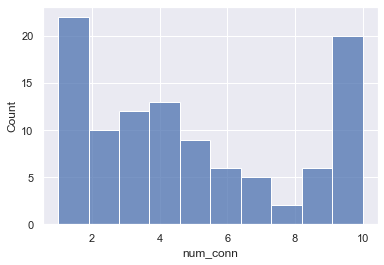

In [5]:
# create a column that counts the number of importance ratings provided
df['num_conn'] = df[network_importance_columns].notnull().sum(axis=1)
print(df['num_conn'].value_counts())
sns.histplot(data=df, x='num_conn', bins=10)

There is a bimodal distribution to the number of connections reported. 22 farmers report the minimum number of connections, 1, and 20 farmers report the maximum number of connections, 10.

### Is there a relationship between the number of connections reported and the time it took to fill out the survey?

<AxesSubplot:xlabel='num_conn', ylabel='interviewtime'>

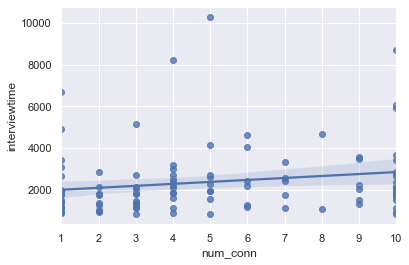

In [6]:
# plot number of connections versus interview completion time
sns.regplot(data=df, x='num_conn', y='interviewtime')

There is a positive relationship here, but there's a range to completion times across all connection counts reported. (I had gotten all excited, as though this question's completion could be a proxy of interviewer effort or overall completeness, but that's a bit of a leap. Some people may just remember or have more connections than others.)

### Do farmers have many or few important or not important connections?

In [7]:
# create a column that calculates the average, min and max importance ratings
df['avg_imp'] = (df[network_importance_columns]).mean(axis=1)
df['min_imp'] = (df[network_importance_columns]).min(axis=1)
df['max_imp'] = (df[network_importance_columns]).max(axis=1)

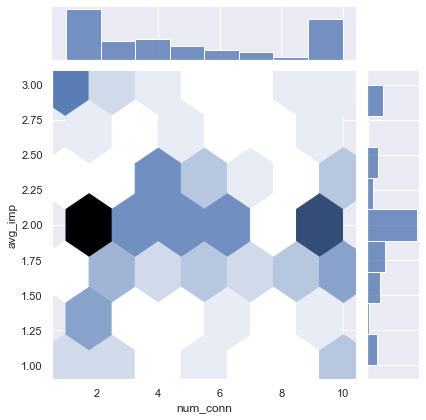

In [8]:
# visualize number of connections versus average of connection importance
sns.jointplot(data=df, x='num_conn', y='avg_imp', kind='hex')

Most farmers listed one connection. Most connections were rated as important (2). The most frequent combinations are farmers with few important connections and farmers with many important connections. No farmers have many unimprotant connections. No farmers have an intermediate number of very important and unimportant connections.

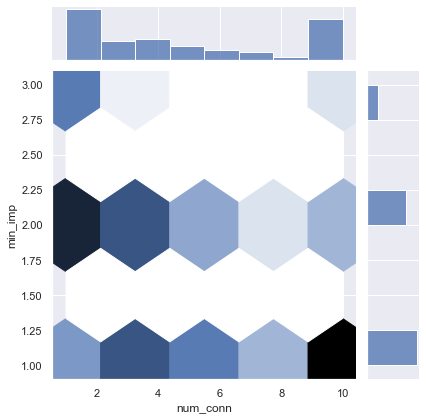

In [9]:
# visualize number of connections versus minimum of connection importance
sns.jointplot(data=df, x='num_conn', y='min_imp', kind='hex')

Farmers who listed more connections often rated at least one connection as very important (1). Farmers who listed fewer connections usually didn't rate at least one connection as very important (1). Few farmers listed many connections all categorized as unimportant.

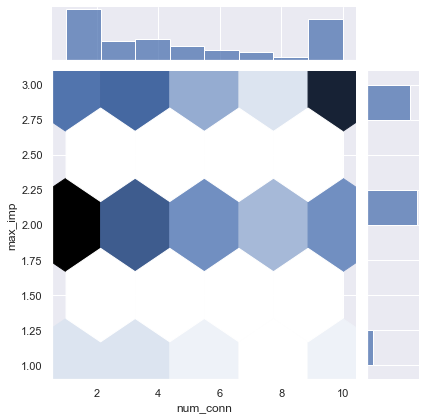

In [10]:
# visualize number of connections versus maximum of connection importance
sns.jointplot(data=df, x='num_conn', y='max_imp', kind='hex')

Farmers who rated more connections often rated at least one connection as unimportant. Farmers who rated fewer connections usually rated them as important at least.

In conclusion, farmers most often listed one or ten connections. The more connections a farmer listed, the more often a connection was rated as unimportant (3) or very important (1) rather than just important (2).